# Capital Asset Pricing Model (Expanded)

The Capital Asset Pricing Model (CAPM) is a cornerstone of modern financial theory, providing a framework for understanding the trade-off between risk and return for individual assets in a diversified portfolio. Developed by William Sharpe in the 1960s, CAPM posits that the expected return of an asset is directly related to its systematic risk, as measured by beta (𝛽). Beta represents the sensitivity of an asset's returns to the returns of the overall market, capturing the asset's exposure to market-wide risk factors.

**Expected Return= R𝑓 + 𝛽 × (Rm− Rf)**

Where:

- R𝑓 is the risk-free rate.
- 𝛽 (beta) is the measure of the asset's volatility relative to the market.
- 𝑅𝑚 is the expected market return.
- (𝑅𝑚 − 𝑅𝑓) is the market risk premium.



Traditional Assets

**Apple Inc. (AAPL)**: Apple is a leading technology company known for its consumer electronics products such as the iPhone, iPad, Mac computers, and services like the App Store and iCloud.

**Microsoft Corporation (MSFT)**: Microsoft is a multinational technology company that develops, manufactures, licenses, supports, and sells software, electronics, personal computers, and related services. Its flagship products include the Windows operating system, Microsoft Office suite, and Azure cloud services.

**Amazon.com, Inc. (AMZN)**: Amazon is a global e-commerce and cloud computing company. It is the largest online retailer in the world and also provides cloud infrastructure services through Amazon Web Services (AWS).

**Alphabet Inc. (GOOGL)**: Alphabet is the parent company of Google and several former Google subsidiaries. Google is the world’s leading search engine and also offers various online advertising services, software, and hardware products.

**Tesla, Inc. (TSLA)**: Tesla is an electric vehicle and clean energy company. It designs and manufactures electric cars, battery energy storage systems, and solar products. Tesla is known for its innovation in the automotive industry.

**SPDR S&P 500 ETF Trust (SPY)**: This ETF seeks to provide investment results that, before expenses, correspond generally to the price and yield performance of the S&P 500 Index, which measures the performance of 500 large-cap U.S. stocks.

**iShares Core U.S. Aggregate Bond ETF (AGG)**: AGG aims to track the investment results of an index composed of the total U.S. investment-grade bond market, including government, corporate, and mortgage-backed securities.

**Invesco Global Listed Private Equity Portfolio (PSP)**: PSP provides exposure to publicly traded private equity companies, offering insight into the performance of private equity investments through publicly listed firms.

**Vanguard Real Estate ETF (VNQ)**: VNQ seeks to track the performance of the MSCI US Investable Market Real Estate 25/50 Index, which measures the performance of real estate investment trusts (REITs) and other real estate-related investments.

**SPDR Gold Shares ETF (GLD)**: GLD seeks to reflect the performance of the price of gold bullion, less the Trust’s expenses. It is often used as a hedge against inflation and currency risk.

**iShares Silver Trust (SLV)**: SLV seeks to reflect the performance of the price of silver, minus expenses. It provides a simple, cost-effective way to gain exposure to the price movement of silver, making it an attractive investment for those looking to diversify their portfolios with commodities.


**United States Oil Fund (USO)**: USO aims to track the daily price movements of West Texas Intermediate (WTI) light, sweet crude oil. It provides exposure to oil prices and is used to gain exposure to the energy market.

**Dow Jones Industrial Average (DJI)**: The DJIA is a stock market index that measures the stock performance of 30 large, publicly-owned companies listed on stock exchanges in the United States. It is one of the oldest and most well-known indices in the world.

Cryptocurrencies

**Bitcoin (BTC-USD)**: Bitcoin is the first and most widely recognized cryptocurrency, often referred to as digital gold. It is a decentralized digital currency without a central bank or single administrator.

**Ethereum (ETH-USD)**: Ethereum is a decentralized platform that enables smart contracts and decentralized applications (DApps) to be built and run without any downtime, fraud, control, or interference from a third party.

**Solana (SOL-USD)**: Solana is a high-performance blockchain supporting builders around the world creating crypto apps that scale today. It is known for its fast transaction speeds and low fees.

**Binance Coin (BNB-USD)**: Binance Coin is the cryptocurrency of the Binance exchange. Initially created as a utility token for discounted trading fees, its use cases have expanded to various applications on Binance's platform and other ecosystems.

**XRP (XRP-USD)**: XRP is a digital payment protocol and cryptocurrency designed for fast and low-cost international money transfers. It is often associated with its parent company, Ripple.

**Toncoin (TON-USD)**: Toncoin is the native cryptocurrency of The Open Network (TON), a blockchain originally developed by Telegram to provide fast, secure, and scalable digital transactions.

**Dogecoin (DOGE-USD)**: Originally created as a joke, Dogecoin has gained popularity as a cryptocurrency due to its active community and use in microtransactions and charitable events.

**Cardano (ADA-USD)**: Cardano is a blockchain platform for smart contracts, aiming to provide more advanced features than any protocol previously developed. It focuses on security, scalability, and sustainability.

**Shiba Inu (SHIB-USD)**: Shiba Inu is a decentralized cryptocurrency created as an experiment in community building and decentralized spontaneous growth, often seen as an alternative to Dogecoin.

**Avalanche (AVAX-USD)**: Avalanche is a platform for launching decentralized applications and enterprise blockchain deployments in one interoperable, scalable ecosystem. It aims to improve blockchain technology’s speed, scalability, and security.

Index

**Bitwise 10 Crypto Index Fund (BITW)**: BITW aims to track the performance of the Bitwise 10 Large Cap Crypto Index, which is designed to provide exposure to the 10 largest cryptocurrencies, weighted by market capitalization.

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm

# Define the assets
assets = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'SPY', 'AGG', 'PSP', 'VNQ', 'SLV', 'GLD', 'USO', 'DJI']
cryptos = ['BTC-USD', 'ETH-USD', 'SOL-USD', 'BNB-USD', 'XRP-USD', 'TON-USD', 'DOGE-USD', 'ADA-USD', 'SHIB-USD', 'AVAX-USD']
index = 'BITW'

# Define the start and end dates
start_date = '2022-01-01'
end_date = '2024-01-01'

# Download data for all assets and the index
data = yf.download(cryptos + assets + [index], start=start_date, end=end_date)['Adj Close']


# Forward fill missing values
data.fillna(method='ffill', inplace=True)

# Drop any remaining NaN values
data.dropna(inplace=True)

# Calculate daily returns
returns = data.pct_change().dropna()
market_returns = returns[index]

[*********************100%%**********************]  24 of 24 completed
/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_19034/4273969760.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


# Beta Calculation

In [40]:
# Initialize dictionaries to store betas for different asset classes
equities_betas = {}
bonds_betas = {}
real_estate_betas = {}
commodities_betas = {}
private_equity_betas = {}
cryptos_betas = {}

# Calculate beta for each asset class
for asset in assets + cryptos:
    if asset in ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'SPY', 'DJI']:
        asset_class = equities_betas
    elif asset == 'AGG':
        asset_class = bonds_betas
    elif asset == 'VNQ':
        asset_class = real_estate_betas
    elif asset in ['GLD', 'USO', 'SLV']:
        asset_class = commodities_betas
    elif asset == 'PSP':
        asset_class = private_equity_betas
    else:
        asset_class = cryptos_betas
    
    # Prepare the data for regression
    X = market_returns
    y = returns[asset]
    
    # Add constant term for intercept
    X = sm.add_constant(X)
    
    # Perform the regression
    model = sm.OLS(y, X).fit()
    
    # Get the beta (slope of the regression line)
    beta = model.params[1]
    
    # Store the beta value
    asset_class[asset] = beta

# # Initialize dictionary to store betas
# betas = {}

# # Calculate beta for each asset
# for asset in cryptos + assets:
#     # Prepare the data for regression
#     X = market_returns
#     y = returns[asset]
    
#     # Add constant term for intercept
#     X = sm.add_constant(X)
    
#     # Perform the regression
#     model = sm.OLS(y, X).fit()
    
#     # Get the beta (slope of the regression line)
#     beta = model.params[1]
    
#     # Store the beta value
#     betas[asset] = beta

/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_19034/2275632419.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_19034/2275632419.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_19034/2275632419.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bet

# Average Risk Free Rate Calculation

1. Determine the Risk-Free Rate

The risk-free rate is typically the return on government bonds, such as U.S. Treasury bills. We used the yield on a 10-year U.S. Treasury bond as a proxy for the risk-free rate.

We decied to determine the **average** risk-free rate over your analysis period, you can use historical data for the 10-year Treasury yield or another appropriate risk-free rate proxy. This data can be sourced from financial websites like the U.S. Treasury or financial data providers.



In [41]:
import pandas as pd
import numpy as np
import yfinance as yf

# Define the dates
start_date = '2022-01-01'
end_date = '2024-01-01'

# Download historical 10-year Treasury yield data
# Assuming we use a symbol like '^TNX' for the 10-year Treasury yield (example purposes, adjust symbol as needed)
treasury_yield = yf.download('^TNX', start=start_date, end=end_date)['Adj Close']

# Convert daily yields from percentage to decimal
treasury_yield = treasury_yield / 100

# Calculate the average risk-free rate over the period
average_risk_free_rate = treasury_yield.mean()

print(f"Average Risk-Free Rate from {start_date} to {end_date}: {average_risk_free_rate:.4f}")


[*********************100%%**********************]  1 of 1 completed

Average Risk-Free Rate from 2022-01-01 to 2024-01-01: 0.0346


# Market Returns

2. Calculate the Expected Market Return

The expected market return can be the average return of broad market for each asset.


In [42]:
# # Calculate the total return for each asset
total_returns = data.iloc[-1] / data.iloc[0] - 1


# # Check for any NaN values or anomalies
print(total_returns.isna().sum())
print(total_returns.describe())

0
count    24.000000
mean     -0.219410
std       0.267896
min      -0.696970
25%      -0.396591
50%      -0.153916
75%      -0.020802
max       0.215575
dtype: float64


In [43]:
# Handle remaining NaNs (if any)
total_returns.dropna(inplace=True)

# Check for extreme outliers (for example, if returns are unrealistically high or low)
total_returns = total_returns[np.abs(total_returns) < 10]  # Adjust threshold as necessary

# Check which assets are present in the index of total_returns
print(total_returns.index)

Index(['AAPL', 'ADA-USD', 'AGG', 'AMZN', 'AVAX-USD', 'BITW', 'BNB-USD',
       'BTC-USD', 'DJI', 'DOGE-USD', 'ETH-USD', 'GLD', 'GOOGL', 'MSFT', 'PSP',
       'SHIB-USD', 'SLV', 'SOL-USD', 'SPY', 'TON-USD', 'TSLA', 'USO', 'VNQ',
       'XRP-USD'],
      dtype='object', name='Ticker')


In [44]:
# Group assets by class
equities = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'SPY', 'DJI']
bonds = ['AGG']
real_estate = ['VNQ']
commodities = ['GLD', 'USO', 'SLV']
private_equity = ['PSP']
cryptos = ['BTC-USD', 'ETH-USD', 'SOL-USD', 'BNB-USD', 'XRP-USD', 'TON-USD', 'DOGE-USD', 'ADA-USD', 'SHIB-USD', 'AVAX-USD']

# Check if assets are present in the index before filtering total_returns
assets_to_filter = equities + bonds + real_estate + commodities + private_equity + cryptos
missing_assets = [asset for asset in assets_to_filter if asset not in total_returns.index]
if missing_assets:
    print(f"The following assets are missing from total_returns: {missing_assets}")

else:
    # Filter total_returns DataFrame to include only the assets used for calculating mean returns
    total_returns_filtered = total_returns.loc[assets_to_filter]

    # Calculate the average return for each asset class
    market_return_equities = total_returns_filtered.loc[equities].mean()
    market_return_bonds = total_returns_filtered.loc[bonds].mean()
    market_return_real_estate = total_returns_filtered.loc[real_estate].mean()
    market_return_commodities = total_returns_filtered.loc[commodities].mean()
    market_return_private_equity = total_returns_filtered.loc[private_equity].mean()
    market_return_crypto = total_returns_filtered.loc[cryptos].mean()

print("Market Returns from 2022-01-01 to 2024-01-01:")
print("Equities:", market_return_equities)
print("Bonds:", market_return_bonds)
print("Real Estate:", market_return_real_estate)
print("Commodities:", market_return_commodities)
print("Private Equity:", market_return_private_equity)
print("Cryptos:", market_return_crypto)


Market Returns from 2022-01-01 to 2024-01-01:
Equities: -0.05099169572056715
Bonds: -0.07470093143080503
Real Estate: -0.16858382767409008
Commodities: 0.12652995452948587
Private Equity: -0.1392486243346306
Cryptos: -0.4511817540465383


# Beta Calculation + Market Risk Premium

3. Calculate the Beta

Beta measures the volatility of a cryptocurrency relative to the market. 

To calculate beta:
1. Collect Historical Price Data: Obtain historical daily prices for each cryptocurrency and the chosen market index.
2. Calculate Returns: Compute the daily returns for each cryptocurrency and the market index.
3. Run a Regression Analysis: Perform a linear regression with the cryptocurrency returns as the dependent variable and the market index returns as the independent variable. The slope of the regression line is the beta.

4. Compute the Market Risk Premium (\(R_m - R_f\))

The market risk premium is the difference between the expected market return and the risk-free rate.


In [45]:
# # Initialize dictionaries to store expected returns for each asset class
# expected_returns_equities = {}
# expected_returns_bonds = {}
# expected_returns_real_estate = {}
# expected_returns_commodities = {}
# expected_returns_private_equity = {}
# expected_returns_crypto = {}

# # Calculate expected returns using CAPM
# for asset, beta in betas.items():
#     if asset in ['SPY', 'AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'DJI']:
#         expected_return = average_risk_free_rate + beta * (market_return_equities - average_risk_free_rate)
#         expected_returns_equities[asset] = expected_return
#     elif asset in ['AGG']:
#         expected_return = average_risk_free_rate + beta * (market_return_bonds - average_risk_free_rate)
#         expected_returns_bonds[asset] = expected_return
#     elif asset in ['VNQ']:
#         expected_return = average_risk_free_rate + beta * (market_return_real_estate - average_risk_free_rate)
#         expected_returns_real_estate[asset] = expected_return
#     elif asset in ['GLD', 'SLV', 'USO']:
#         expected_return = average_risk_free_rate + beta * (market_return_commodities - average_risk_free_rate)
#         expected_returns_commodities[asset] = expected_return
#     elif asset in ['PSP']:
#         expected_return = average_risk_free_rate + beta * (market_return_private_equity - average_risk_free_rate)
#         expected_returns_private_equity[asset] = expected_return
#     elif asset in ['BTC-USD', 'ETH-USD', 'SOL-USD', 'BNB-USD', 'XRP-USD', 'TON-USD', 'DOGE-USD', 'ADA-USD', 'SHIB-USD', 'AVAX-USD']:
#         expected_return = average_risk_free_rate + beta * (market_return_crypto - average_risk_free_rate)
#         expected_returns_crypto[asset] = expected_return

# # Combine all expected returns into a single DataFrame
# capm_df = pd.DataFrame({
#     'Beta': betas,
#     'Expected Return (CAPM)': {**expected_returns_equities, **expected_returns_bonds, **expected_returns_real_estate, **expected_returns_commodities, **expected_returns_private_equity, **expected_returns_crypto}
# })

# # Display the DataFrame
# print(capm_df)


In [46]:
# Equities CAPM
equities_capm = {}
for asset, beta in equities_betas.items():
    equities_capm[asset] = average_risk_free_rate + beta * (market_returns.mean() - average_risk_free_rate)

# Bonds CAPM
bonds_capm = {}
for asset, beta in bonds_betas.items():
    bonds_capm[asset] = average_risk_free_rate + beta * (market_returns.mean() - average_risk_free_rate)

# Real Estate CAPM
real_estate_capm = {}
for asset, beta in real_estate_betas.items():
    real_estate_capm[asset] = average_risk_free_rate + beta * (market_returns.mean() - average_risk_free_rate)
    
# Commodities CAPM
commodities_capm = {}
for asset, beta in commodities_betas.items():
    commodities_capm[asset] = average_risk_free_rate + beta * (market_returns.mean() - average_risk_free_rate)

# Private Equity CAPM
private_equity_capm = {}
for asset, beta in private_equity_betas.items():
    private_equity_capm[asset] = average_risk_free_rate + beta * (market_returns.mean() - average_risk_free_rate)

# Cryptos CAPM
cryptos_capm = {}
for asset, beta in cryptos_betas.items():
    cryptos_capm[asset] = average_risk_free_rate + beta * (market_returns.mean() - average_risk_free_rate)

# Print CAPM results for each asset class
print("Equities CAPM:", equities_capm)
print("Bonds CAPM:", bonds_capm)
print("Real Estate CAPM:", real_estate_capm)
print("Commodities CAPM:", commodities_capm)
print("Private Equity CAPM:", private_equity_capm)
print("Cryptos CAPM:", cryptos_capm)

Equities CAPM: {'AAPL': 0.029443437929792402, 'MSFT': 0.029515140327462563, 'AMZN': 0.02700566743589955, 'GOOGL': 0.02887656827173576, 'TSLA': 0.025135615378896293, 'SPY': 0.030848152676506195, 'DJI': 0.03429036286165469}
Bonds CAPM: {'AGG': 0.03420207594810128}
Real Estate CAPM: {'VNQ': 0.03153957626396929}
Commodities CAPM: {'SLV': 0.03227662623292685, 'GLD': 0.03392570310482294, 'USO': 0.03318769898443645}
Private Equity CAPM: {'PSP': 0.02907386973445386}
Cryptos CAPM: {'BTC-USD': 0.018398612385364152, 'ETH-USD': 0.015741162794767286, 'SOL-USD': 0.00949224384038641, 'BNB-USD': 0.0209457263632744, 'XRP-USD': 0.014872970502454098, 'TON-USD': 0.020220864295823305, 'DOGE-USD': 0.01730681623365693, 'ADA-USD': 0.015417052158910451, 'SHIB-USD': 0.016490466806382994, 'AVAX-USD': 0.01361517951426371}


In [50]:
# Combine all expected returns into a single DataFrame
capm_df = pd.DataFrame({
    'Asset': equities + bonds + real_estate + commodities + private_equity + cryptos,
    'Asset Class': ['Equities'] * len(equities) + ['Bonds'] * len(bonds) + ['Real Estate'] * len(real_estate) + ['Commodities'] * len(commodities) + ['Private Equity'] * len(private_equity) + ['Cryptos'] * len(cryptos),
    'Beta': list(equities_betas.values()) + list(bonds_betas.values()) + list(real_estate_betas.values()) + list(commodities_betas.values()) + list(private_equity_betas.values()) + list(cryptos_betas.values()),
    'Expected Return (CAPM)': list(equities_capm.values()) + list(bonds_capm.values()) + list(real_estate_capm.values()) + list(commodities_capm.values()) + list(private_equity_capm.values()) + list(cryptos_capm.values())
})

# Display the DataFrame
print(capm_df)


       Asset     Asset Class      Beta  Expected Return (CAPM)
0       AAPL        Equities  0.148944                0.029443
1       MSFT        Equities  0.146872                0.029515
2       AMZN        Equities  0.219366                0.027006
3      GOOGL        Equities  0.165319                0.028877
4       TSLA        Equities  0.273389                0.025136
5        SPY        Equities  0.108364                0.030848
6        DJI        Equities  0.008925                0.034290
7        AGG           Bonds  0.011475                0.034202
8        VNQ     Real Estate  0.088390                0.031540
9        GLD     Commodities  0.067098                0.032277
10       USO     Commodities  0.019459                0.033926
11       SLV     Commodities  0.040779                0.033188
12       PSP  Private Equity  0.159620                0.029074
13   BTC-USD         Cryptos  0.468009                0.018399
14   ETH-USD         Cryptos  0.544777                0

# Visualization

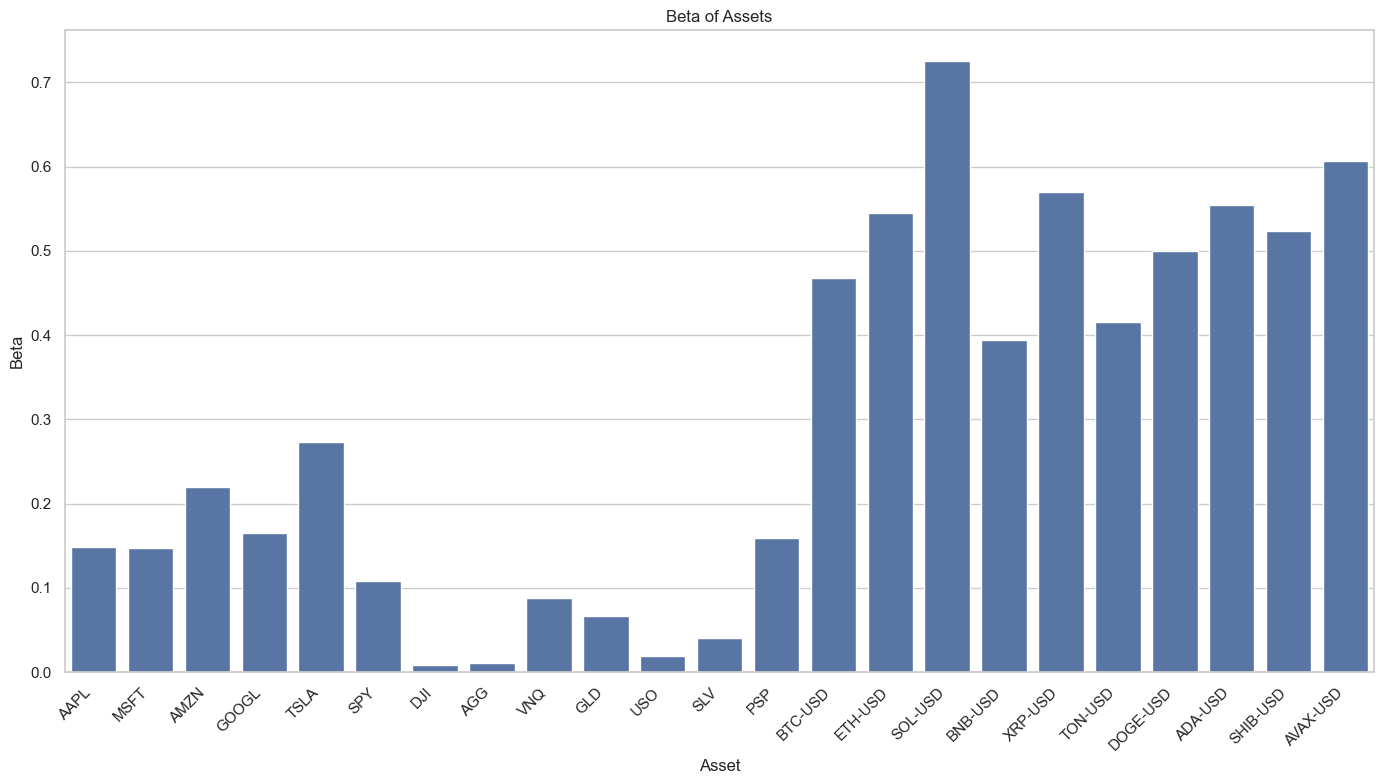

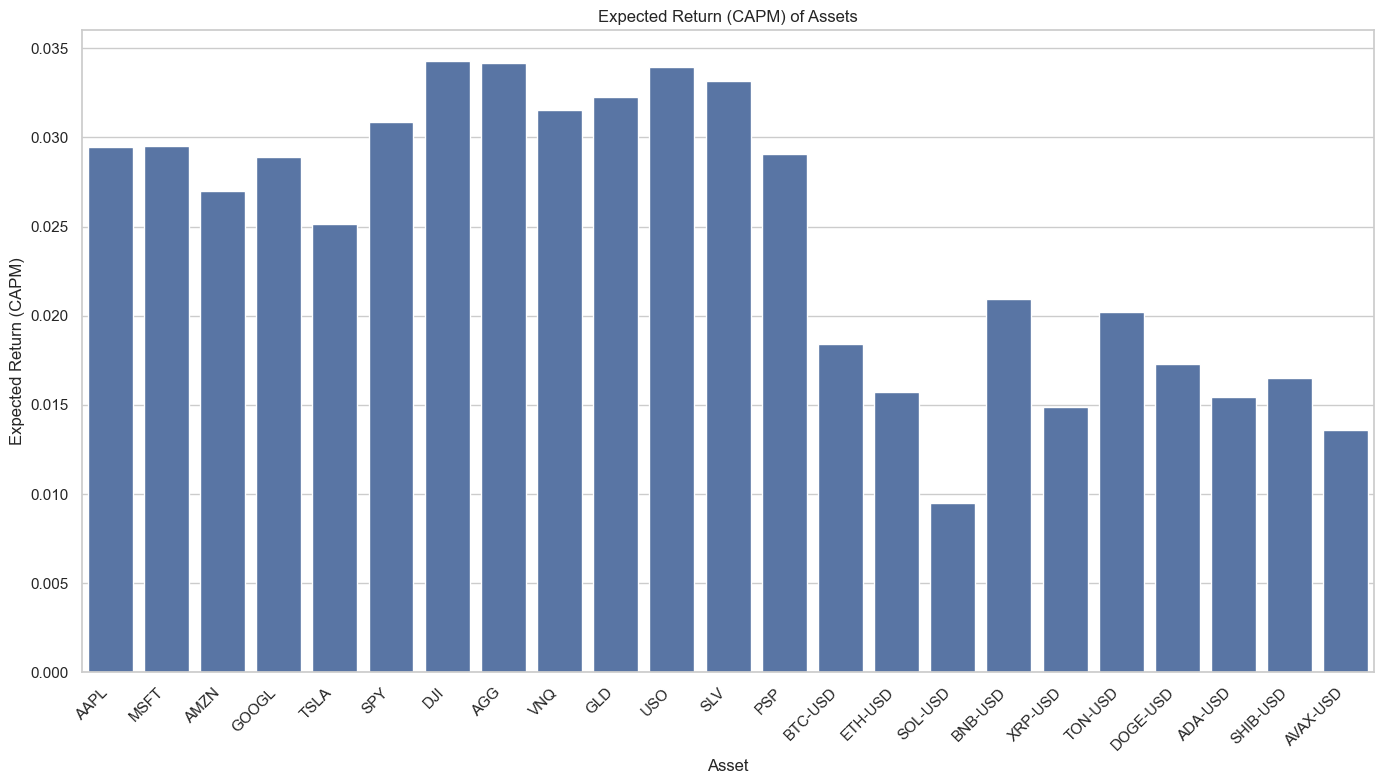

In [53]:
# Setting the style
sns.set(style="whitegrid")

# Plot Beta
plt.figure(figsize=(14, 8))
sns.barplot(x=capm_df['Asset'], y=capm_df['Beta'])
plt.title('Beta of Assets')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.xlabel('Asset')  # Set x-axis label
plt.ylabel('Beta')
plt.tight_layout()  # Adjust layout to prevent clipping of x-axis labels
plt.show()

# Plot Expected Return (CAPM)
plt.figure(figsize=(14, 8))
sns.barplot(x=capm_df['Asset'], y=capm_df['Expected Return (CAPM)'])
plt.title('Expected Return (CAPM) of Assets')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.xlabel('Asset')  # Set x-axis label
plt.ylabel('Expected Return (CAPM)')
plt.tight_layout()  # Adjust layout to prevent clipping of x-axis labels
plt.show()
